In [14]:
import numpy as np 
import pandas as pd
# import preprocessing from sklearn
from sklearn import preprocessing
# import preprocessing from sklearn
from sklearn.preprocessing import OneHotEncoder

In [15]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# CNN IMAGE LOADING

In [44]:
train_path = 'croppedImages1/train'
test_path = 'croppedImages1/test'
valid_path = 'croppedImages1/valid'

In [45]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(450,450),classes=['benign','malignant','other'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(450,450),classes=['benign','malignant','other'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(450,450),classes=['benign','malignant','other'],batch_size=10)

Found 774 images belonging to 3 classes.
Found 194 images belonging to 3 classes.
Found 242 images belonging to 3 classes.


In [46]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [47]:
imgs, labels = next(train_batches)

C:\Users\ThePC\Anaconda3\envs\tensorflow_env\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


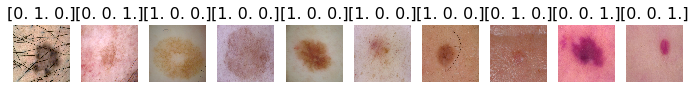

In [48]:
plots(imgs, titles=labels)

# BUILD AND TRAIN

In [49]:
cnn_model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(450,450,3)),
    Flatten(),
    Dense(3,activation='softmax')
])

In [50]:
cnn_model.compile(Adam(lr=.0001),loss='mean_squared_error', metrics=['accuracy'])

In [51]:
cnn_model.fit_generator(train_batches,steps_per_epoch=75,validation_data=valid_batches,validation_steps=25, epochs=5,verbose=1)

Epoch 1/5
75/75 [==============================] - 262s 3s/step - loss: 0.2214 - accuracy: 0.6653 - val_loss: 0.0000e+00 - val_accuracy: 0.7397
Epoch 2/5
75/75 [==============================] - 256s 3s/step - loss: 0.1973 - accuracy: 0.7040 - val_loss: 0.0000e+00 - val_accuracy: 0.7397
Epoch 3/5
75/75 [==============================] - 234s 3s/step - loss: 0.1978 - accuracy: 0.7046 - val_loss: 0.0000e+00 - val_accuracy: 0.7397
Epoch 4/5
75/75 [==============================] - 226s 3s/step - loss: 0.2129 - accuracy: 0.6801 - val_loss: 0.6667 - val_accuracy: 0.7397
Epoch 5/5
75/75 [==============================] - 253s 3s/step - loss: 0.2044 - accuracy: 0.6949 - val_loss: 0.0000e+00 - val_accuracy: 0.7397


C:\Users\ThePC\Anaconda3\envs\tensorflow_env\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


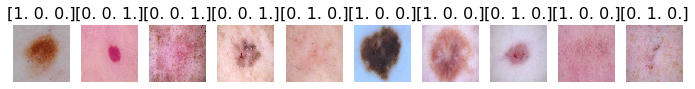

In [53]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [54]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [55]:
predictions = cnn_model.predict_generator(test_batches,steps=20,verbose=1)

20/20 [==============================] - 19s 951ms/step


In [56]:
predictions

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0